# Oasis_Infobyte_Task3

# CAR PRICE PREDICTION WITH MACHINE LEARNING

# Importing Machine Learning and Regression Environment Setup with Scikit-Learn, XGBoost, and Optuna

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, PolynomialFeatures, OneHotEncoder,StandardScaler,PowerTransformer, MinMaxScaler, RobustScaler
from sklearn.model_selection import KFold, cross_val_predict, train_test_split,GridSearchCV,cross_val_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge,ElasticNet
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer

from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR


from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.feature_selection import SelectKBest,SelectPercentile,f_classif,f_regression,mutual_info_regression,mutual_info_classif,SelectFromModel,RFE

from xgboost import XGBRegressor
from xgboost import plot_importance


import optuna

#importing plotly and cufflinks in offline mode
import cufflinks as cf
import plotly.offline
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split

from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LinearRegression

from sklearn.linear_model import Ridge
from sklearn.model_selection import RandomizedSearchCV

from sklearn.linear_model import Lasso
from sklearn.model_selection import RandomizedSearchCV

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV

import joblib


In [2]:
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 900)
pd.set_option('display.max_colwidth', 200)

df = pd.read_csv('C:\\Users\\HP\\Documents\\Python Programs\\Oasis Infoyte\\car data.csv', delimiter=',')
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


# Pre Processing Data 

# 1.Detecting and Displaying Duplicated Rows in a DataFrame

In [4]:
duplicate_rows = df[df.duplicated()]

if not duplicate_rows.empty:
    # Display all rows where values are equal to those in the duplicated rows
    comparison_rows = df[df.eq(duplicate_rows.iloc[0]).all(axis=1)]
    print(comparison_rows)
else:
    print("No duplicated rows found.")


   Car_Name  Year  Selling_Price  Present_Price  Driven_kms Fuel_Type  \
15   ertiga  2016           7.75          10.79       43000    Diesel   
17   ertiga  2016           7.75          10.79       43000    Diesel   

   Selling_type Transmission  Owner  
15       Dealer       Manual      0  
17       Dealer       Manual      0  


# 2.Missing Data Analysis: Identifying and Quantifying Missing Values in a DataFrame

In [5]:
def missing (df):
    missing_number = df.isnull().sum().sort_values(ascending=False)
    missing_percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_values = pd.concat([missing_number, missing_percent], axis=1, keys=['Missing_Number', 'Missing_Percent'])
    return missing_values

missing(df)

,Missing_Number,Missing_Percent
Car_Name,0,0.0
Year,0,0.0
Selling_Price,0,0.0
Present_Price,0,0.0
Driven_kms,0,0.0
Fuel_Type,0,0.0
Selling_type,0,0.0
Transmission,0,0.0
Owner,0,0.0


# 3.Exploring Column Diversity: Analyzing Unique Values in a DataFrame

In [6]:
df.nunique()

Car_Name          98
Year              16
Selling_Price    156
Present_Price    148
Driven_kms       206
Fuel_Type          3
Selling_type       2
Transmission       2
Owner              3
dtype: int64

In [7]:
df['Age'] = 2020 - df['Year']
df.drop('Year',axis=1,inplace = True)

# 4.Renaming Columns for Enhanced Clarity and Readability in a DataFrame

In [8]:
df.rename(columns = {'Selling_Price':'Selling_Price(lacs)','Present_Price':'Present_Price(lacs)','Owner':'Past_Owners'},inplace = True)

# Exploratory Data Analysis (EDA)

# 1.Univariate Analysis

In [9]:
df.columns

Index(['Car_Name', 'Selling_Price(lacs)', 'Present_Price(lacs)', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Past_Owners', 'Age'],
      dtype='object')

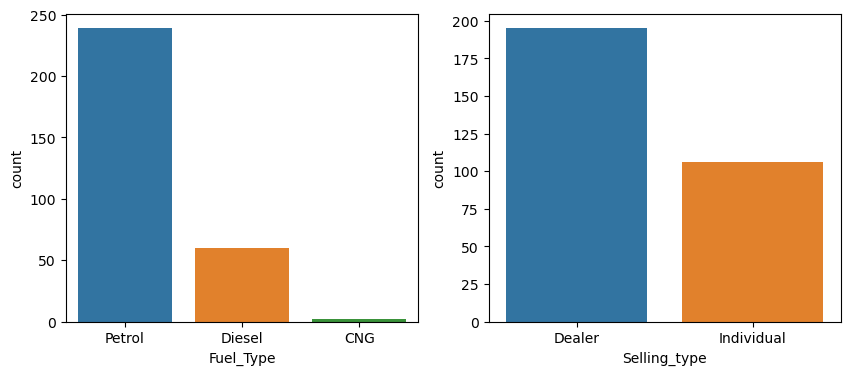

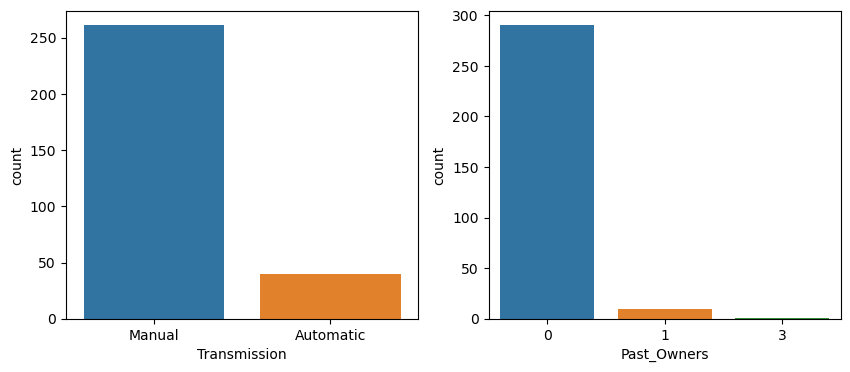

In [10]:
cat_cols = ['Fuel_Type','Selling_type','Transmission','Past_Owners']
i=0
while i < 4:
    fig = plt.figure(figsize=[10,4])
    #ax1 = fig.add_subplot(121)
    #ax2 = fig.add_subplot(122)
    
    #ax1.title.set_text(cat_cols[i])
    plt.subplot(1,2,1)
    sns.countplot(x=cat_cols[i], data=df)
    i += 1
    
    #ax2.title.set_text(cat_cols[i])
    plt.subplot(1,2,2)
    sns.countplot(x=cat_cols[i], data=df)
    i += 1
    
    plt.show()

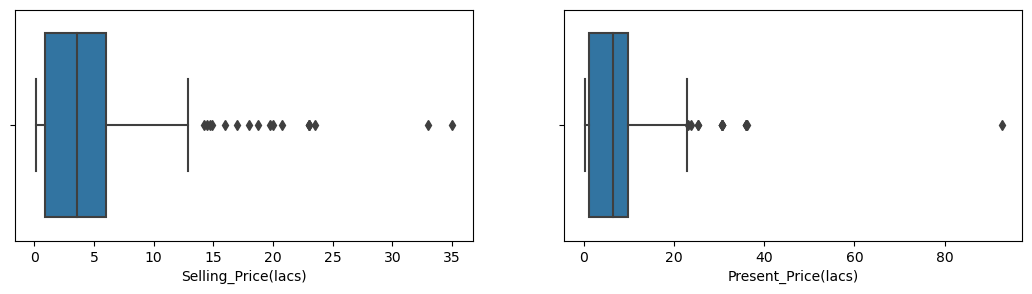

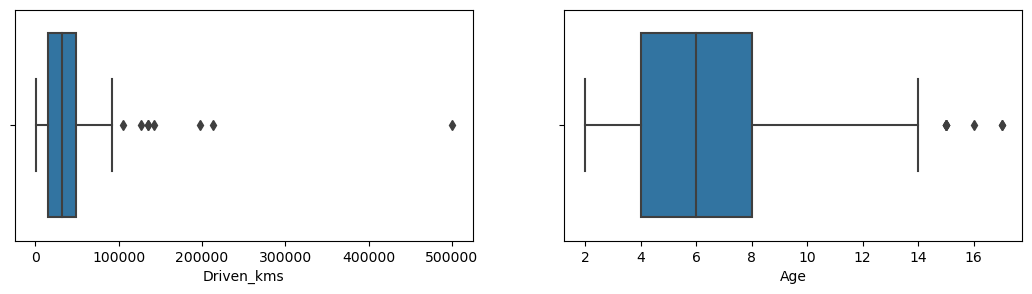

In [11]:
num_cols=['Selling_Price(lacs)', 'Present_Price(lacs)', 'Driven_kms','Age']
i=0
while i<4:
    fig=plt.figure(figsize=[13,3])
    
    plt.subplot(1,2,1)
    sns.boxplot(x=num_cols[i],data=df)
    i+=1
    
    plt.subplot(1,2,2)
    sns.boxplot(x=num_cols[i],data=df)
    i+=1
    
    plt.show()

In [12]:
df[df['Present_Price(lacs)'] > df['Present_Price(lacs)'].quantile(0.99)]

,Car_Name,Selling_Price(lacs),Present_Price(lacs),Driven_kms,Fuel_Type,Selling_type,Transmission,Past_Owners,Age
64,fortuner,33.0,36.23,6000,Diesel,Dealer,Automatic,0,3
86,land cruiser,35.0,92.60,78000,Diesel,Dealer,Manual,0,10


In [13]:
df[df['Selling_Price(lacs)'] > df['Selling_Price(lacs)'].quantile(0.99)]

,Car_Name,Selling_Price(lacs),Present_Price(lacs),Driven_kms,Fuel_Type,Selling_type,Transmission,Past_Owners,Age
63,fortuner,23.5,35.96,47000,Diesel,Dealer,Automatic,0,5
64,fortuner,33.0,36.23,6000,Diesel,Dealer,Automatic,0,3
86,land cruiser,35.0,92.60,78000,Diesel,Dealer,Manual,0,10


In [14]:
df[df['Driven_kms'] > df['Driven_kms'].quantile(0.99)]

,Car_Name,Selling_Price(lacs),Present_Price(lacs),Driven_kms,Fuel_Type,Selling_type,Transmission,Past_Owners,Age
84,innova,3.49,13.46,197176,Diesel,Dealer,Manual,0,15
179,Honda Karizma,0.31,1.05,213000,Petrol,Individual,Manual,0,10
196,Activa 3g,0.17,0.52,500000,Petrol,Individual,Automatic,0,12


# 2.Bivariate/Multi-Variate Analysis

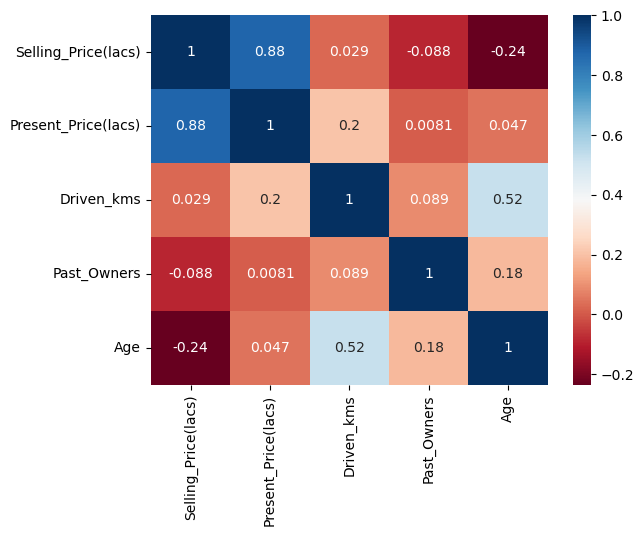

In [15]:
sns.heatmap(df.corr(),annot=True,cmap="RdBu")
plt.show()

In [16]:
df.corr()['Selling_Price(lacs)']

Selling_Price(lacs)    1.000000
Present_Price(lacs)    0.878914
Driven_kms             0.029187
Past_Owners           -0.088344
Age                   -0.236141
Name: Selling_Price(lacs), dtype: float64

In [17]:
df.pivot_table(values='Selling_Price(lacs)',index='Selling_type',columns='Fuel_Type')

Fuel_Type,CNG,Diesel,Petrol
Selling_type,,,
Dealer,3.1,10.181525,5.252388
Individual,NaN,16.000000,0.726857


# Creating Dummies for Categorical Features

In [18]:
df.drop(labels='Car_Name',axis= 1, inplace = True)
df.head()

,Selling_Price(lacs),Present_Price(lacs),Driven_kms,Fuel_Type,Selling_type,Transmission,Past_Owners,Age
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,6
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,7
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,3
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,9
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,6


In [19]:
df=pd.get_dummies(data=df,drop_first=True)
df.head()

,Selling_Price(lacs),Present_Price(lacs),Driven_kms,Past_Owners,Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Selling_type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,6,0,1,0,1
1,4.75,9.54,43000,0,7,1,0,0,1
2,7.25,9.85,6900,0,3,0,1,0,1
3,2.85,4.15,5200,0,9,0,1,0,1
4,4.60,6.87,42450,0,6,1,0,0,1


# Train-Test Split

In [20]:
X=df.drop('Selling_Price(lacs)',axis=1)
y=df['Selling_Price(lacs)']

In [21]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

print('X Train:- ',X_train.shape)
print('X Test:- ',X_test.shape)
print('Y Train:- ',y_train.shape)
print('y Test:- ',y_test.shape)

X Train:-  (240, 8)
X Test:-  (61, 8)
Y Train:-  (240,)
y Test:-  (61,)


In [22]:
CV = []
R2_train = []
R2_test = []

def car_pred_model(model,model_name):
    # Training model
    model.fit(X_train,y_train)
            
    # R2 score of train set
    y_pred_train = model.predict(X_train)
    R2_train_model = r2_score(y_train,y_pred_train)
    R2_train.append(round(R2_train_model,2))
    
    # R2 score of test set
    y_pred_test = model.predict(X_test)
    R2_test_model = r2_score(y_test,y_pred_test)
    R2_test.append(round(R2_test_model,2))
    
    # R2 mean of train set using Cross validation
    cross_val = cross_val_score(model ,X_train ,y_train ,cv=5)
    cv_mean = cross_val.mean()
    CV.append(round(cv_mean,2))
    
    # Printing results
    print("Train R2-score :",round(R2_train_model,2))
    print("Test R2-score :",round(R2_test_model,2))
    print("Train CV scores :",cross_val)
    print("Train CV mean :",round(cv_mean,2))
    
    # Plotting Graphs 
    # Residual Plot of train data
    fig, ax = plt.subplots(1,2,figsize = (10,4))
    ax[0].set_title('Residual Plot of Train samples')
    sns.distplot((y_train-y_pred_train),hist = False,ax = ax[0])
    ax[0].set_xlabel('y_train - y_pred_train')
    
    # Y_test vs Y_train scatter plot
    ax[1].set_title('y_test vs y_pred_test')
    ax[1].scatter(x = y_test, y = y_pred_test)
    ax[1].set_xlabel('y_test')
    ax[1].set_ylabel('y_pred_test')
    
    plt.show()

# Standard Linear Regression 

Train R2-score : 0.88
Test R2-score : 0.86
Train CV scores : [0.8990761  0.89776701 0.82981561 0.81795625 0.76012544]
Train CV mean : 0.84


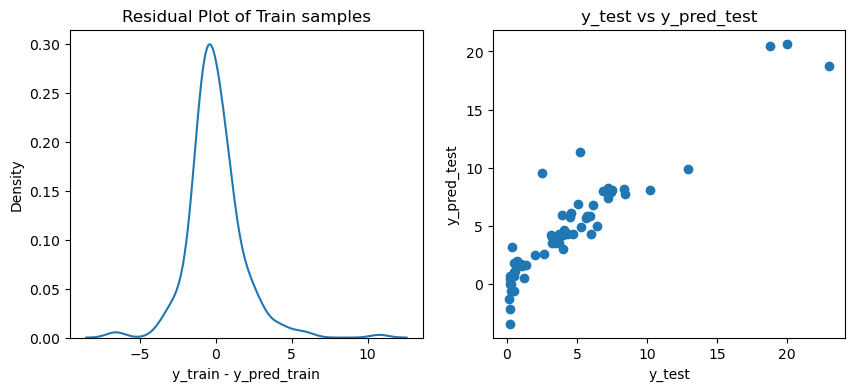

In [23]:
lr = LinearRegression()
car_pred_model(lr,"Linear_regressor.pkl")

# Ridge Regression 

Train R2-score : 0.88
Test R2-score : 0.86
Train CV scores : [0.89907549 0.89777457 0.82981785 0.81795705 0.73278673]
Train CV mean : 0.84


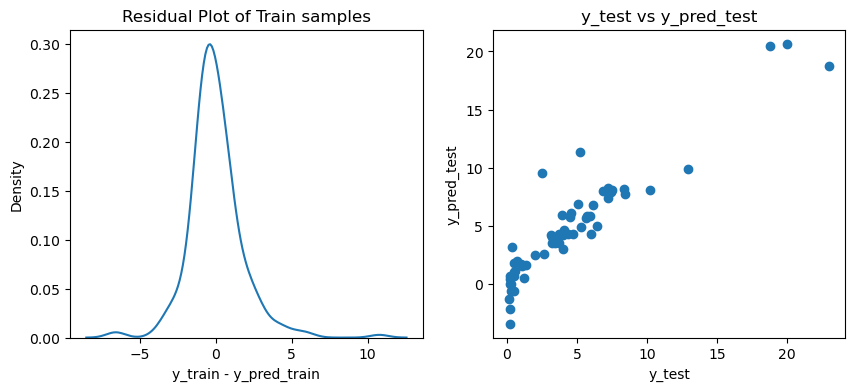

In [24]:
rg = Ridge()
# range of alpha 
alpha = np.logspace(-3,3,num=14)

# Creating RandomizedSearchCV to find the best estimator of hyperparameter
rg_rs = RandomizedSearchCV(estimator = rg, param_distributions = dict(alpha=alpha))

car_pred_model(rg_rs,"ridge.pkl")

# Lasso Regression

Train R2-score : 0.88
Test R2-score : 0.87
Train CV scores : [0.89905191 0.89942301 0.83017798 0.81811836 0.70121811]
Train CV mean : 0.83


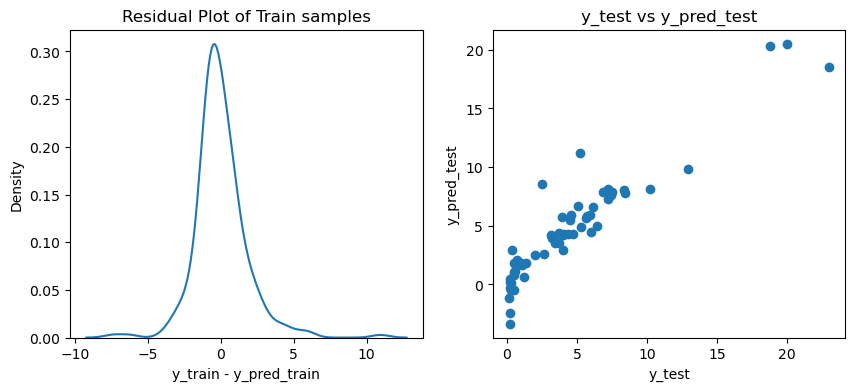

In [25]:
ls = Lasso()
alpha = np.logspace(-3,3,num=14) # range for alpha

ls_rs = RandomizedSearchCV(estimator = ls, param_distributions = dict(alpha=alpha))
car_pred_model(ls_rs,"lasso.pkl")

# Random Forest Regression

In [26]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest model
rf = RandomForestRegressor()

# Hyperparameters dict
param_grid = {
    "n_estimators": list(range(500, 1000, 100)),
    "max_depth": list(range(4, 9, 4)),
    "min_samples_split": list(range(4, 9, 2)),
    "min_samples_leaf": [1, 2, 5, 7],
    "max_features": ['auto', 'sqrt']
}

# Randomized Search
rf_rs = RandomizedSearchCV(estimator=rf, param_distributions=param_grid, random_state=42)

# Fit the Randomized Search to the data
rf_rs.fit(X_train, y_train)

# Define the car_pred_model function
def car_pred_model(model, filename, X_train, y_train, X_test, y_test):
    # Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Calculate R2 scores
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)

    # Print the results
    print(f"Train R2-score: {r2_train:.2f}")
    print(f"Test R2-score: {r2_test:.2f}")

    # Save the model to a file
    joblib.dump(model, filename)
    print(f"Model saved as {filename}")

# Print the evaluation metrics using the car_pred_model function
car_pred_model(rf_rs.best_estimator_, 'random_forest.pkl', X_train, y_train, X_test, y_test)

Train R2-score: 0.96
Test R2-score: 0.95
Model saved as random_forest.pkl


# Gradient Boosting regression

In [28]:
# Gradient Boosting model
gb = GradientBoostingRegressor()

# Hyperparameters
learning_rate = [0.01, 0.1, 0.2]  # Example values, you can adjust
n_estimators = [100, 200, 300]  # Example values, you can adjust
max_depth = [3, 4, 5]  # Example values, you can adjust
min_samples_split = [2, 5, 10]  # Example values, you can adjust
min_samples_leaf = [1, 2, 4]  # Example values, you can adjust
max_features = ['auto', 'sqrt', 'log2']  # Example values, you can adjust

# Hyperparameters dict
param_grid = {
    "learning_rate": learning_rate,
    "n_estimators": n_estimators,
    "max_depth": max_depth,
    "min_samples_split": min_samples_split,
    "min_samples_leaf": min_samples_leaf,
    "max_features": max_features
}

# Randomized Search
gb_rs = RandomizedSearchCV(estimator=gb, param_distributions=param_grid, random_state=42)

# Fit the Randomized Search to the data
gb_rs.fit(X_train, y_train)

# Print the evaluation metrics using the car_pred_model function
car_pred_model(gb_rs.best_estimator_, 'gradient_boosting.pkl', X_train, y_train, X_test, y_test)


Train R2-score: 1.00
Test R2-score: 0.96
Model saved as gradient_boosting.pkl
